# Họ và tên: Trần Thuận Phát
# MSSV: 21127666

In [1]:
import numpy as np
import random
import pandas as pd 
from keras.datasets import fashion_mnist    
from keras import utils  
from keras.models import Sequential
from keras.layers import Conv2D, Dense, MaxPool2D, Dropout, Flatten
from keras.optimizers import Adam
import matplotlib.pyplot as plt

# Load Data

In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


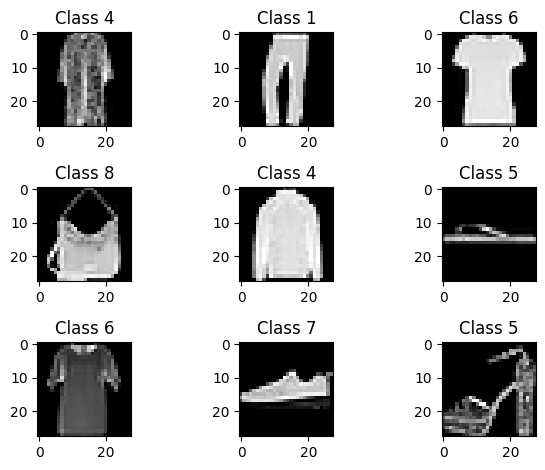

In [3]:
for i in range(9):
    plt.subplot(3,3,i+1)
    num = random.randint(0, len(X_train))
    plt.imshow(X_train[num], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[num]))
    
plt.tight_layout()

# DATA PROCESSING

In [4]:
X_train = X_train.reshape(60000, 784) 
X_test = X_test.reshape(10000, 784)   

X_train = X_train.astype('float32')   
X_test = X_test.astype('float32')

X_train /= 255                        
X_test /= 255

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


# Convert to one-hot encoding

In [5]:
no_classes = 10

Y_train = utils.to_categorical(y_train, no_classes)
Y_test = utils.to_categorical(y_test, no_classes)

# Plot Digits

In [6]:
def plot_digits(X, Y):
    for i in range(20):
        plt.subplot(5, 4, i+1)
        plt.tight_layout()
        plt.imshow(X[i].reshape(28, 28), cmap='gray')
        plt.title(f'Digit:{np.argmax(Y[i])}')
        plt.xticks([])
        plt.yticks([])
    plt.show()

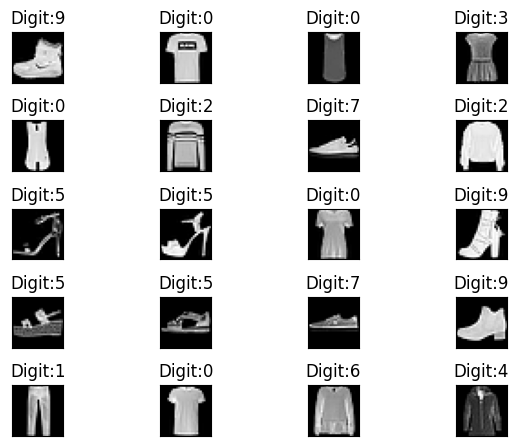

In [7]:
plot_digits(X_train, Y_train)

# Lenet5 Model

In [8]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPool2D(strides=2))
model.add(Conv2D(filters=48, kernel_size=(5,5), padding='valid', activation='relu'))
model.add(MaxPool2D(strides=2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [9]:
model.build()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 48)        38448     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 48)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1200)              0         
                                                                 
 dense (Dense)               (None, 256)               3

In [11]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history_model = model.fit(X_train.reshape(X_train.shape[0], 28, 28, 1), Y_train, batch_size=128, epochs=10, verbose=1, validation_data=(X_test.reshape(X_test.shape[0], 28, 28, 1), Y_test))

Epoch 1/10
469/469 [==============================] - 44s 91ms/step - loss: 0.5192 - accuracy: 0.8108 - val_loss: 0.3850 - val_accuracy: 0.8633
Epoch 2/10
469/469 [==============================] - 42s 90ms/step - loss: 0.3239 - accuracy: 0.8835 - val_loss: 0.3120 - val_accuracy: 0.8886
Epoch 3/10
469/469 [==============================] - 47s 101ms/step - loss: 0.2727 - accuracy: 0.9015 - val_loss: 0.2950 - val_accuracy: 0.8924
Epoch 4/10
469/469 [==============================] - 37s 79ms/step - loss: 0.2438 - accuracy: 0.9104 - val_loss: 0.2953 - val_accuracy: 0.8933
Epoch 5/10
469/469 [==============================] - 36s 77ms/step - loss: 0.2224 - accuracy: 0.9184 - val_loss: 0.2529 - val_accuracy: 0.9091
Epoch 6/10
469/469 [==============================] - 35s 74ms/step - loss: 0.2064 - accuracy: 0.9234 - val_loss: 0.2573 - val_accuracy: 0.9066
Epoch 7/10
469/469 [==============================] - 35s 75ms/step - loss: 0.1856 - accuracy: 0.9312 - val_loss: 0.2504 - val_accuracy

In [ ]:
score = model.evaluate(X_test.reshape(X_test.shape[0], 28, 28, 1), Y_test, batch_size=32)
print(score)

313/313 [==============================] - 2s 7ms/step - loss: 0.2517 - accuracy: 0.9173


# Evaluate the model

In [ ]:
loss, accuracy = model.evaluate(X_test.reshape(X_test.shape[0], 28, 28, 1), Y_test, verbose=0)
print('Test accuracy:', accuracy)

Test accuracy: 0.9172999858856201


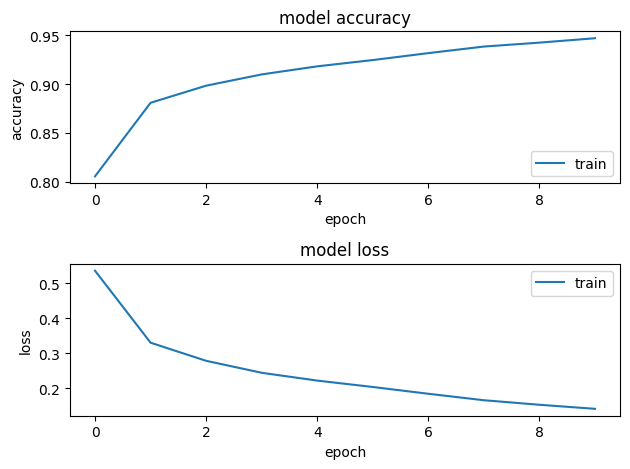

In [ ]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history_model.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history_model.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

In [ ]:
predicted_classes = model.predict(X_test.reshape(X_test.shape[0], 28, 28, 1))
predicted_classes = [np.argmax(softmaxArray) for softmaxArray in predicted_classes]
Y_True = [np.argmax(softmaxArray) for softmaxArray in Y_test]

correct_indices = np.where(np.array(predicted_classes) == np.array(Y_True))[0]
incorrect_indices = np.where(np.array(predicted_classes) != np.array(Y_True))[0]

313/313 [==============================] - 2s 7ms/step


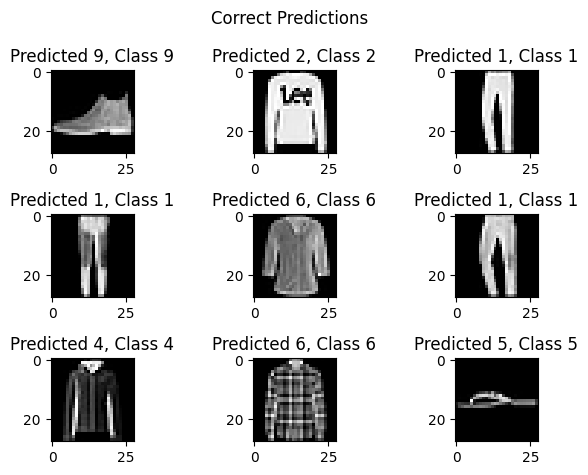

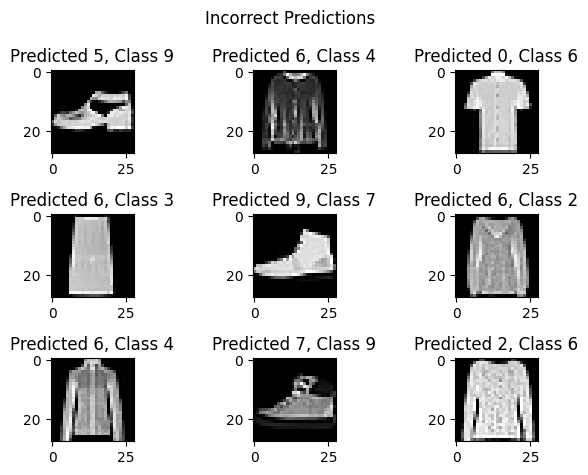

In [ ]:
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
plt.suptitle("Correct Predictions")  
plt.tight_layout()
    
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))
plt.suptitle("Incorrect Predictions")
plt.tight_layout()